In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
B = 10000
n = 10
beta_0 = 2
sigma_u = np.sqrt(4)

beta_0_estimates = []
beta_1_estimates = []
R2_simple = []
R2_polynomial = []

for _ in range(B):
    x_i = np.random.normal(0, 1, n).reshape(-1, 1)
    u_i = np.random.normal(0, sigma_u, n)
    y_i = beta_0 + u_i
    reg = LinearRegression().fit(x_i, y_i)
    beta_0_estimates.append(reg.intercept_)
    beta_1_estimates.append(reg.coef_[0])
    R2_simple.append(reg.score(x_i, y_i))

    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(x_i)
    reg_poly = LinearRegression().fit(X_poly, y_i)
    R2_polynomial.append(reg_poly.score(X_poly, y_i))

beta_0_estimates = np.array(beta_0_estimates)
beta_1_estimates = np.array(beta_1_estimates)
R2_simple = np.array(R2_simple)
R2_polynomial = np.array(R2_polynomial)

# 1. Histogram of $\hat \beta_0$ 


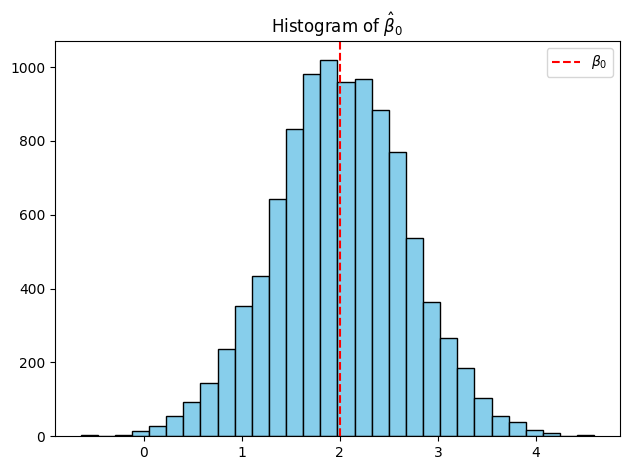

In [7]:
plt.hist(beta_0_estimates, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=beta_0, color='red', linestyle='--', label=r'$\beta_0$')
plt.title(r"Histogram of $\hat{\beta}_0$")
plt.legend()
plt.tight_layout()
plt.show()

Histogram of $\hat \beta_0$ is centered around 2, which is the true value of $\beta_0$. This shows that despite the misspecified regression, the intercept is consistently estimated well.


# 2 Histogram of  $\hat \beta_1$ 

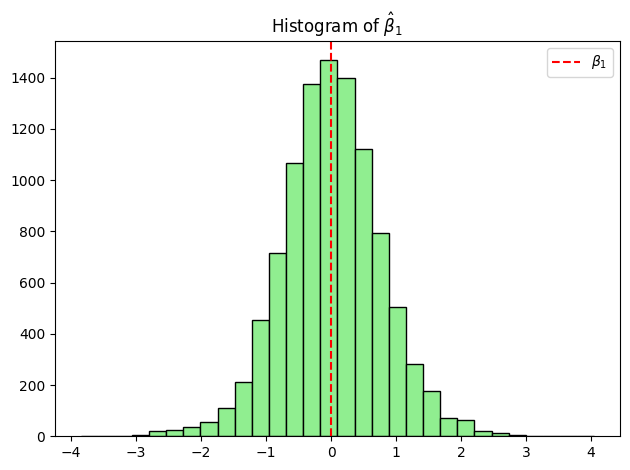

In [8]:
plt.hist(beta_1_estimates, bins=30, color='lightgreen', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label=r'$\beta_1$')
plt.title(r"Histogram of $\hat{\beta}_1$")
plt.legend()
plt.tight_layout()
plt.show()

The distribution of $\hat \beta_1$ is centered around 0 which is the true value of $\beta_1$. 
This makes sense because there is no true relationship between $x_i$ and $y_i$ so $\hat \beta_1$ fluctuates around 0 in repeated samples.

# Histogram of $R^2$ for the Simple Regression:

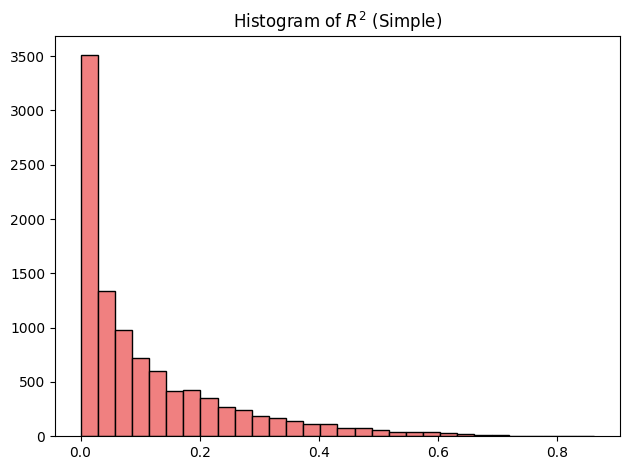

In [10]:
plt.hist(R2_simple, bins=30, color='lightcoral', edgecolor='black')
plt.title(r"Histogram of $R^2$ (Simple)")
plt.tight_layout()
plt.show()

The values of $R^2$ for the simple regression are quite low. This is expected since the model is misspecified and there is no true relationship between $x_i$ and $y_i$

# Histogram of $R^2$ for the Polynomial Regression:

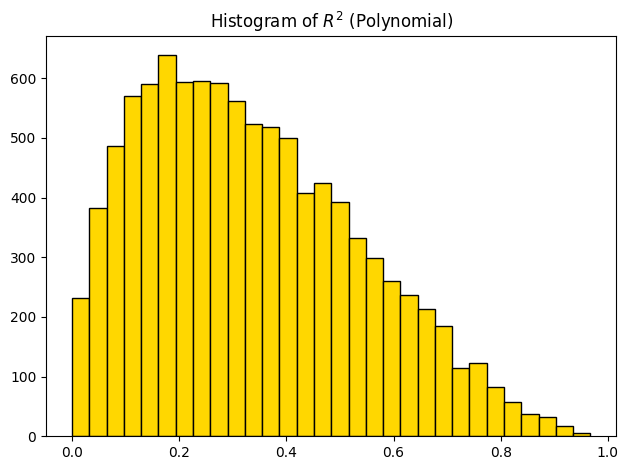

In [11]:
plt.hist(R2_polynomial, bins=30, color='gold', edgecolor='black')
plt.title(r"Histogram of $R^2$ (Polynomial)")
plt.tight_layout()
plt.show()

In the polynomial regression the $R^2$ values are slightly higher but not by much. This indicates that adding higher-order terms (like $x^2$ and $x^3$) doesn't greatly improve the fit, which aligns with the fact that there is still no actual relationship between $y_i$ and any powers of $x_i$

# Conclusion:

The simple and polynomial regressions show similar behavior because the true relationship between $y_i$ and $x_i$ is nonexistent. While the polynomial regression shows marginally higher $R^2$ the quality of the regression hasn't meaningfully improved. This indicates that adding higher-order terms without any true underlying relationship won't necessarily improve the model.
